In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
import cv2
from PIL import Image
import math
%matplotlib notebook

In [12]:
import keras
from keras.datasets import mnist as mn

Using TensorFlow backend.


In [1]:
#一、数据准备阶段、数据处理：

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [129]:
# 二。 超参数、placeholder、w、b的设定
input_features_num = 28*28
hidden_layer_1_num = 500
output_classes= 10


x = tf.placeholder("float", [None,input_features_num], "x")
y = tf.placeholder("float", [None,output_classes], "y")


weights = {
    "w1" : tf.Variable(tf.random_normal([input_features_num, hidden_layer_1_num]), "w1"),
    "w2" : tf.Variable(tf.random_normal([hidden_layer_1_num, output_classes]), "w2")

}
biases = {
    "b1" : tf.Variable(tf.constant(0.1, shape=[hidden_layer_1_num]), name="b1"),
    "b2" : tf.Variable(tf.constant(0.1, shape=[output_classes]), name="b2"),
}

In [130]:
# 三、 定义模型（网络结构）
def mlp(x, weights, biases):
    layer_1 = tf.matmul(x, weights["w1"])
    layer_1 = tf.add(layer_1, biases["b1"])
    layer_1 = tf.nn.relu(layer_1, name="relu")
    output = tf.matmul(layer_1, weights["w2"])
    output = tf.add(output, biases["b2"])
    return output
pred_model = mlp(x, weights, biases)

In [131]:
# 四、 定义（loss + optimizer + metric）
loss_all = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred_model, labels=tf.argmax(y, 1), name="cross_entropy")
loss = tf.reduce_mean(loss_all) + tf.contrib.layers.l2_regularizer(0.0001)(weights["w1"]) + tf.contrib.layers.l2_regularizer(0.0001)(weights["w2"])

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(0.05, global_step, 600, 0.99)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss, global_step=global_step)


correct_prediction = tf.equal(tf.argmax(pred_model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [132]:
#  五、 执行训练模型  (mnist数据集)
BATCH_SIZE = 100
TRAINING_STEPS = 3000


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(TRAINING_STEPS):
        start = (i * BATCH_SIZE) % mnist.train.images.shape[0]
        end = min(start + BATCH_SIZE, mnist.train.images.shape[0])
        xs, ys = mnist.train.images[start:end], mnist.train.labels[start:end]
        l, _, step = sess.run([loss, optimizer, global_step], feed_dict={x:xs, y:ys})
        if i % 50 == 0:
            print("After %s training steps, loss on training batch is :   %s " % (step, l))          
            acc = sess.run([accuracy], feed_dict={x:mnist.train.images, y:mnist.train.labels})
            print("After %s training steps, accuracy on test data is :   %s " % (step, acc))
            print("strat:",start)
            print("\n\n")
    


After 1 training steps, loss on training batch is :   280.8815 
After 1 training steps, accuracy on test data is :   [0.11116364] 
strat: 0



After 51 training steps, loss on training batch is :   30.749018 
After 51 training steps, accuracy on test data is :   [0.73225456] 
strat: 5000



After 101 training steps, loss on training batch is :   28.642248 
After 101 training steps, accuracy on test data is :   [0.8146182] 
strat: 10000



After 151 training steps, loss on training batch is :   32.294525 
After 151 training steps, accuracy on test data is :   [0.8340545] 
strat: 15000



After 201 training steps, loss on training batch is :   25.794207 
After 201 training steps, accuracy on test data is :   [0.85523635] 
strat: 20000



After 251 training steps, loss on training batch is :   26.228157 


KeyboardInterrupt: 

In [3]:
mnist.test.labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [10]:
with tf.Session() as sess:
    a = tf.Variable("x", 3)
    tf.global_variables_initializer().run()

    print(sess.run(a))
print(a)

b'x'
<tf.Variable 'Variable_2:0' shape=() dtype=string_ref>


In [24]:
trainX.shape

(60000, 784)

In [26]:
a = [1, 2, 3, "zx", 'zy', 2, 2, 1, 9, "zz"]
b = pd.get_dummies(a)
b

,1,2,3,9,zx,zy,zz
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0
8,0,0,0,1,0,0,0
9,0,0,0,0,0,0,1


In [29]:
b.columns

Index([1, 2, 3, 9, 'zx', 'zy', 'zz'], dtype='object')

In [30]:
b.columns[5]

'zy'

In [32]:
0.9**4

0.6561

In [13]:
#一、数据准备阶段、数据处理：

(trainX, trainY), (testX, testY) = mn.load_data()
trainY_dummy = np.array(pd.get_dummies(trainY))
testY_dummy = np.array(pd.get_dummies(testY))
trainX = trainX.reshape(-1, 28*28)
testX = testX.reshape(-1, 28*28)
print(trainX.shape)
print(trainY_dummy.shape)
print(testX.shape)
print(testY_dummy.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [139]:
# 二。 超参数、placeholder、w、b的设定
input_features_num = 28*28
hidden_layer_1_num = 500
output_classes= 10


x = tf.placeholder("float", [None,input_features_num], "x")
y = tf.placeholder("float", [None,output_classes], "y")


weights = {
    "w1" : tf.Variable(tf.random_normal([input_features_num, hidden_layer_1_num]), "w1"),
    "w2" : tf.Variable(tf.random_normal([hidden_layer_1_num, output_classes]), "w2")

}
biases = {
    "b1" : tf.Variable(tf.constant(0.1, shape=[hidden_layer_1_num]), name="b1"),
    "b2" : tf.Variable(tf.constant(0.1, shape=[output_classes]), name="b2"),
}

In [140]:
# 三、 定义模型（网络结构）
def mlp(x, weights, biases):
    layer_1 = tf.matmul(x, weights["w1"])
    layer_1 = tf.add(layer_1, biases["b1"])
    layer_1 = tf.nn.relu(layer_1, name="relu")
    output = tf.matmul(layer_1, weights["w2"])
    output = tf.add(output, biases["b2"])
    return output
pred_model = mlp(x, weights, biases)

In [143]:
# 四、 定义（loss + optimizer + metric）
loss_all = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred_model, labels=tf.argmax(y, 1), name="cross_entropy")
loss = tf.reduce_mean(loss_all) 
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(0.05, global_step, 600, 0.99)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss, global_step=global_step)


correct_prediction = tf.equal(tf.argmax(pred_model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [144]:
#  五、 执行训练模型  （trainX数据集）
BATCH_SIZE = 100
TRAINING_STEPS = 3000


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(TRAINING_STEPS):
        start = (i * BATCH_SIZE) % trainX.shape[0]
        end = min(start + BATCH_SIZE, trainX.shape[0])
        xs, ys = trainX[start:end], trainY_dummy[start:end]
        l, _, step = sess.run([loss, optimizer, global_step], feed_dict={x:xs, y:ys})
        if i % 50 == 0:
            print("After %s training steps, loss on training batch is :   %s " % (step, l))          
            acc = sess.run([accuracy], feed_dict={x:testX, y:testY_dummy})
            print("After %s training steps, accuracy on test data is :   %s " % (step, acc))
            print("strat:",start)
            print("\n\n")
    

After 1 training steps, loss on training batch is :   65860.08 
After 1 training steps, accuracy on test data is :   [0.101] 
strat: 0



After 51 training steps, loss on training batch is :   2.3010502 
After 51 training steps, accuracy on test data is :   [0.1008] 
strat: 5000



After 101 training steps, loss on training batch is :   2.3028915 
After 101 training steps, accuracy on test data is :   [0.1149] 
strat: 10000



After 151 training steps, loss on training batch is :   2.3014274 
After 151 training steps, accuracy on test data is :   [0.1152] 
strat: 15000



After 201 training steps, loss on training batch is :   2.3000975 
After 201 training steps, accuracy on test data is :   [0.1148] 
strat: 20000



After 251 training steps, loss on training batch is :   2.2987683 
After 251 training steps, accuracy on test data is :   [0.1148] 
strat: 25000



After 301 training steps, loss on training batch is :   2.304619 
After 301 training steps, accuracy on test data is :   [0.1

KeyboardInterrupt: 

In [112]:
#  五、 执行训练模型
BATCH_SIZE = 100
TRAINING_STEPS = 3000


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(TRAINING_STEPS):
        start = (i * BATCH_SIZE) % trainX.shape[0]
        end = min(start + BATCH_SIZE, trainX.shape[0])
        xs, ys = trainX[start:end], trainY_dummy[start:end]
        l, _, step = sess.run([loss, optimizer, global_step], feed_dict={x:xs, y:ys})
        if i % 50 == 0:
            print("After %s training steps, loss on training batch is :   %s " % (step, l))          
            acc = sess.run([accuracy], feed_dict={x:testX, y:testY_dummy})
            print("After %s training steps, accuracy on test data is :   %s " % (step, acc))
            print("strat:",start)
            print("\n\n")
    


After 1 training steps, loss on training batch is :   48511.555 
After 1 training steps, accuracy on test data is :   [0.098] 
strat: 0



After 51 training steps, loss on training batch is :   51281064.0 
After 51 training steps, accuracy on test data is :   [0.1051] 
strat: 5000



After 101 training steps, loss on training batch is :   51255496.0 
After 101 training steps, accuracy on test data is :   [0.1047] 
strat: 10000



After 151 training steps, loss on training batch is :   51229960.0 
After 151 training steps, accuracy on test data is :   [0.1045] 
strat: 15000



After 201 training steps, loss on training batch is :   51204450.0 
After 201 training steps, accuracy on test data is :   [0.1168] 
strat: 20000



After 251 training steps, loss on training batch is :   51178964.0 
After 251 training steps, accuracy on test data is :   [0.1168] 
strat: 25000



After 301 training steps, loss on training batch is :   51153504.0 
After 301 training steps, accuracy on test data is 

KeyboardInterrupt: 

In [64]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

In [66]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [73]:
mnist.train.images.shape

(55000, 784)

In [74]:
mnist.train.labels.shape

(55000, 10)

In [76]:
mnist.test.images.shape

(10000, 784)

In [75]:
mnist.test.labels.shape

(10000, 10)

In [85]:
mnist.train.images[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
z = trainX[:3] == mnist.train.images[:3]
z.sum()

1625

In [89]:
28*28*3

2352

In [91]:
trainX[0].shape

(784,)

In [92]:
mnist.train.images[0].shape

(784,)

In [104]:
trainY[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [115]:
trainY_dummy[-10:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=uint8)

In [100]:
mnist.train.labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

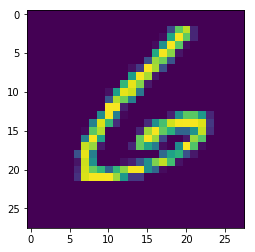

In [116]:
plt.imshow(trainX[-2].reshape(28, 28))

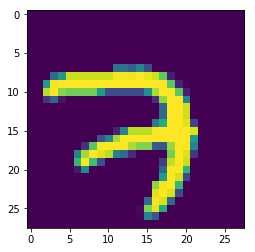

In [101]:
plt.imshow(mnist.train.images[0].reshape(28, 28))

In [72]:
3000000/600

5000.0

In [75]:
0.8*(0.99**50)

0.4840048537100291

In [82]:
x = np.linspace(0, 1000, 1000)
y = (1+x) / (10+x)

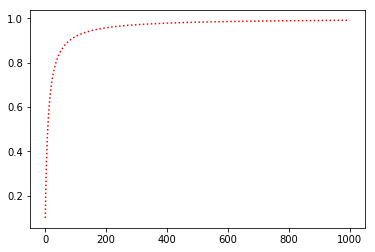

In [83]:
# plt.x
plt.plot(x, y, "r:")

In [92]:
y

array([0.1       , 0.18189263, 0.2501251 , 0.30785219, 0.35732666,
       0.40020013, 0.43771107, 0.47080636, 0.50022235, 0.52654028,
       0.55022511, 0.57165317, 0.59113233, 0.60891692, 0.62521884,
       0.64021609, 0.65405925, 0.66687662, 0.67877814, 0.68985857,
       0.70020007, 0.70987415, 0.71894342, 0.72746287, 0.73548102,
       0.74304087, 0.75018061, 0.75693431, 0.76333246, 0.76940241,
       0.77516879, 0.78065382, 0.78587759, 0.79085834, 0.79561264,
       0.80015559, 0.80450098, 0.80866142, 0.81264847, 0.81647275,
       0.82014403, 0.82367131, 0.8270629 , 0.83032648, 0.83346916,
       0.83649755, 0.83941775, 0.84223548, 0.84495603, 0.84758434,
       0.85012502, 0.85258239, 0.85496048, 0.85726306, 0.85949367,
       0.86165564, 0.86375208, 0.86578594, 0.86775996, 0.86967676,
       0.87153879, 0.87334836, 0.87510765, 0.87681874, 0.87848358,
       0.88010401, 0.8816818 , 0.8832186 , 0.88471599, 0.88617547,
       0.88759845, 0.88898629, 0.89034029, 0.89166165, 0.89295

In [125]:
v1 = tf.Variable(0, dtype=tf.float32)
step = tf.Variable(0, trainable=False)
ema = tf.train.ExponentialMovingAverage(0.99, step)

In [126]:
maintain_averages_op = ema.apply([v1])

In [151]:
# x = tf.get_variable("xx", np.arange(30).reshape(5, 6))
x = tf.Variable(np.arange(30).reshape(5, 6))
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(x.shape)
#     print(sess.run(x.shape))

   

(5, 6)


In [141]:
print(dir(x))

['SaveSliceInfo', '_AsTensor', '_OverloadAllOperators', '_OverloadOperator', '_TensorConversionFunction', '__abs__', '__add__', '__and__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ipow__', '__irealdiv__', '__isub__', '__iter__', '__itruediv__', '__le__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_add_variable_with_custom_getter', '_as_graph_element', '_caching_device',

In [152]:
if 3: print(3)

3


In [154]:
600000/60/60

166.66666666666666

In [155]:
50000/128*350

136718.75

In [142]:
x.shape

TensorShape([Dimension(5), Dimension(6)])

In [39]:
a = tf.reduce_sum([1, 2, 3])

In [68]:
with tf.Session() as x:
    print(x.run())

TypeError: run() missing 1 required positional argument: 'fetches'

In [60]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'Variable_3:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'mm:0' shape=(3, 4) dtype=float32_ref>,
 <tf.Variable 'mm_1:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'mm_2:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'pp:0' shape=(100,) dtype=int32_ref>,
 <tf.Variable 'pp_1:0' shape=(3, 4) dtype=float32_ref>,
 <tf.Variable 'ppl:0' shape=(3, 4) dtype=float32_ref>]

In [55]:
a = tf.Variable(np.random.randint(0, 10, 100), name="pp")
a

<tf.Variable 'pp:0' shape=(100,) dtype=int32_ref>

In [58]:
tf.get_variable("ppl", (3, 4))

<tf.Variable 'ppl:0' shape=(3, 4) dtype=float32_ref>

In [64]:
tf.GraphKeys.TRAINABLE_VARIABLES

'trainable_variables'